# PyNEST noise neuron

**Example of feeding arbitrary shaped noise signal into a neuron**

**OCNC summer school 2018, 28.6.2018**

**Espen Hagen - espen.hagen@fys.uio.no**

In [1]:
%pylab inline
seed(1234)
import nest
import nest.voltage_trace
import scipy.signal as ss

Populating the interactive namespace from numpy and matplotlib


In [2]:
nest.ResetKernel()
dt = 0.1
t = 1000.
neuron = nest.Create('iaf_psc_exp')

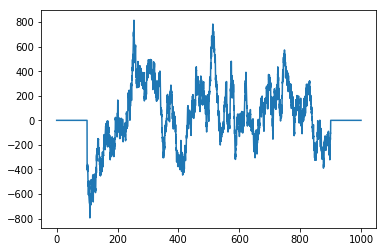

In [3]:
# create stimulation current with 1/f**2 spectral content
scaling = 20.
stim_t = np.arange(dt, t, dt)
stim_i = normal(size=stim_t.size).cumsum()
# filter out the lowest frequencies
b, a = ss.butter(N=1, Wn=5. / (2.*1000/dt), btype='high')
stim_i = ss.filtfilt(b, a, stim_i)
# scale signal
stim_i *= scaling
# set current to zero for t < 100 ms and t > 900 ms
stim_i[stim_t < 100] = 0.
stim_i[stim_t > 900] = 0.
# plot current
plot(stim_t, stim_i)

In [4]:
# set up noise generator object
noise = nest.Create('step_current_generator')
nest.SetStatus(noise, {'amplitude_times' : stim_t, 'amplitude_values' : stim_i})

In [5]:
# record membrane voltage
mm = nest.Create('multimeter')
nest.SetStatus(mm, {'record_from' : ['V_m'], 'withtime' : True, 'interval' : dt})

In [6]:
# connect nodes and devices
nest.Connect(noise, neuron)
nest.Connect(mm, neuron)

In [7]:
# Simulate
nest.Simulate(t)

[[<matplotlib.lines.Line2D at 0x7f7cebd74240>]]

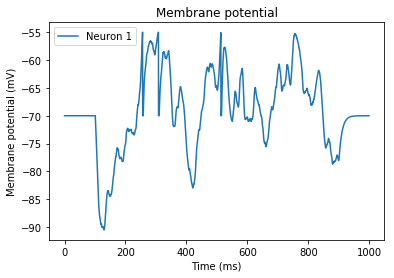

In [8]:
# plot
nest.voltage_trace.from_device(mm)